##  🌳 **Bosque Aleatorio (Random Forest)** 🌳

---

### Introducción:

Se realizará un clasificador mediante un Bosque Aleatorio (Random Forest) para predecir la especie de flor del género Iris a partir de sus características morfológicas (largo y ancho de pétalos y sépalos).

---

### 1. Importaciones

In [9]:
# Librerías generales
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Ajustes estéticos
sns.set_style("whitegrid")
%matplotlib inline

---

### 2. Cargar datos

Usaremos el dataset Iris de sklearn, el cual contiene 150 ejemplos, 4 características y 3 clases (Iris setosa, Iris versicolor, Iris virginica).

In [3]:
iris = load_iris()
X = iris.data   # Características: [sepal length, sepal width, petal length, petal width]
y = iris.target # Etiquetas: [0 = setosa, 1 = versicolor, 2 = virginica]

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---

### 3. Exploración de datos

Antes de entrenar el modelo, es importante conocer la distribución de las variables y la naturaleza de las clases.

In [4]:
# Información general del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
# Analítica descriptiva del conjunto de datos
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


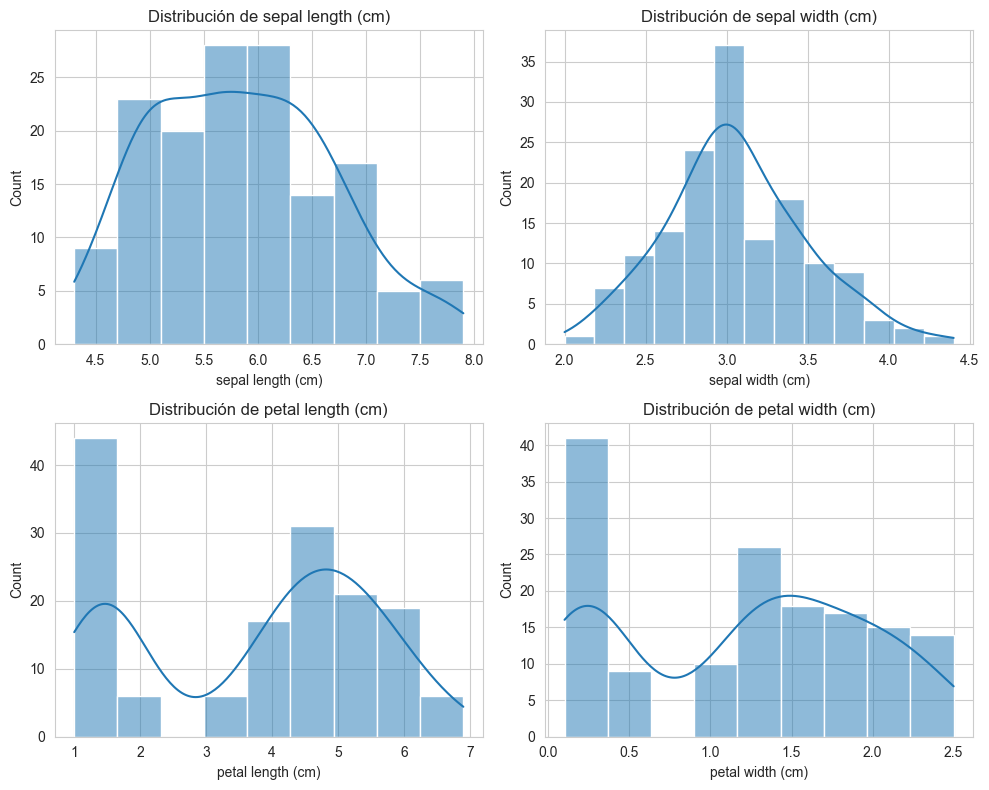

In [6]:
# Distribución de las variables
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.ravel()

for idx, col in enumerate(iris.feature_names):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

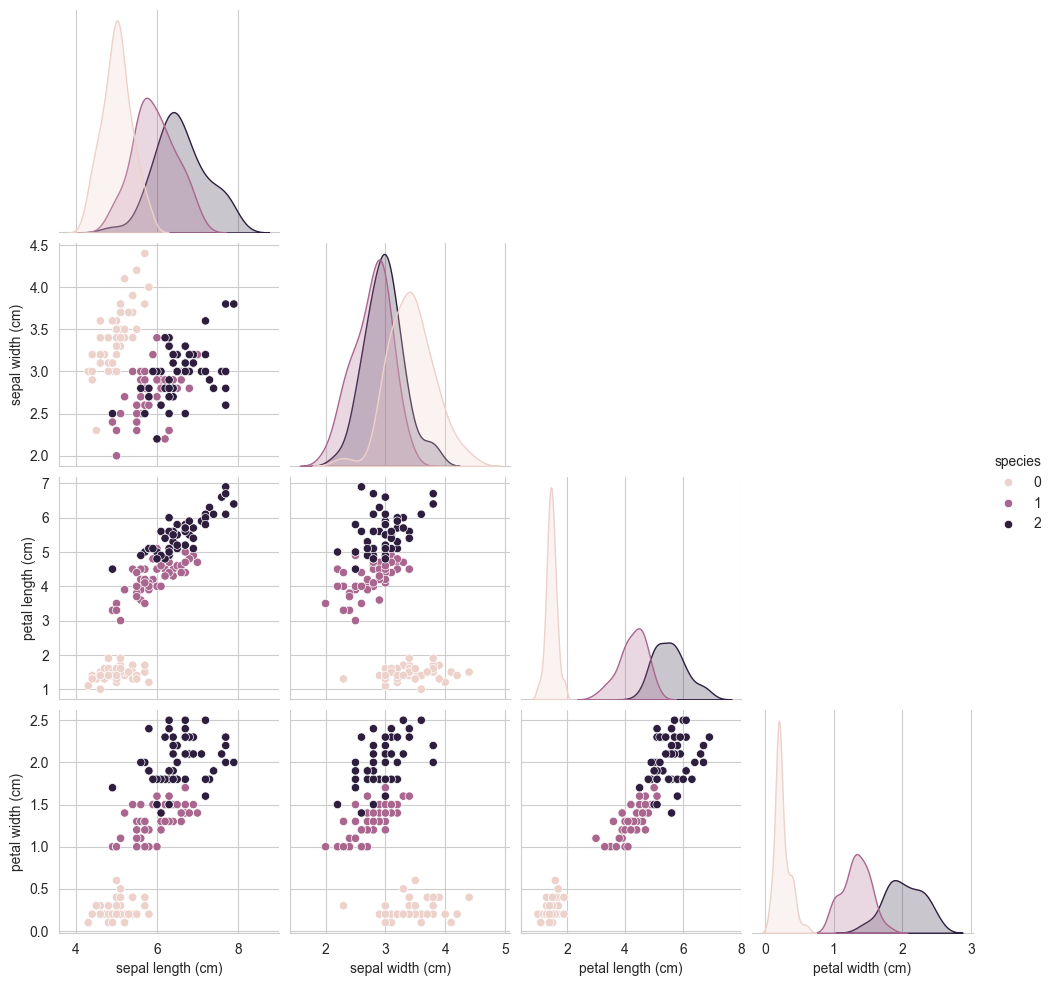

In [7]:
sns.pairplot(df, hue="species", diag_kind="kde", corner=True)
plt.show()

---

### 4. División del conjunto de datos

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

### 5. Entrenamiento del modelo

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

---

### 6.  Métricas de desempeño

In [12]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {acc:.2f}")

Exactitud del modelo: 1.00


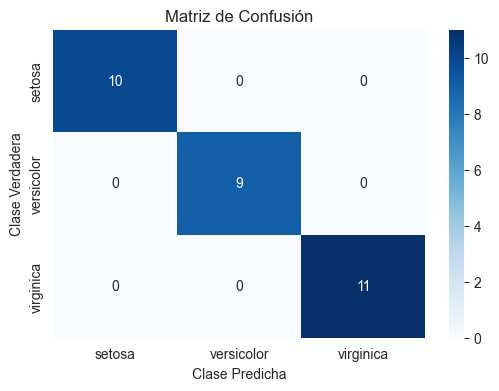

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.ylabel("Clase Verdadera")
plt.xlabel("Clase Predicha")
plt.show()

In [14]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Reporte de Clasificación:\n", report)

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

